<a href="https://colab.research.google.com/github/SandyCOG/10Analytics_Hackathons/blob/main/10Analytics_(Unemployment_rate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load datasets

unemploy_df = pd.read_csv("/content/drive/MyDrive/10Analytics/1. unemployment-rate-men-vs-women.csv")
nat_str_df = pd.read_csv("/content/drive/MyDrive/10Analytics/2. national-strategy-for-youth-employment.csv")
gov_exp_df = pd.read_csv("/content/drive/MyDrive/10Analytics/3. share-of-education-in-government-expenditure.csv")
pop_elec_df = pd.read_csv("/content/drive/MyDrive/10Analytics/4. share-of-the-population-with-access-to-electricity.csv")
firms_hist_df = pd.read_excel("/content/drive/MyDrive/10Analytics/5. Total_firms_Historical_data.xlsx")
country_cd_df = pd.read_csv("/content/drive/MyDrive/10Analytics/6. Country Codes.csv")

In [4]:
#checking the size of the datasets

print(f"dataset shape unemploy_df: {unemploy_df.shape}")
print(f"dataset shape nat_str_df: {nat_str_df.shape}")
print(f"dataset shape gov_exp_df: {gov_exp_df.shape}")
print(f"dataset shape pop_elec_df: {pop_elec_df.shape}")
print(f"dataset shape firms_hist_df: {firms_hist_df.shape}")
print(f"dataset shape country_cd_df: {country_cd_df.shape}")

dataset shape unemploy_df: (58578, 7)
dataset shape nat_str_df: (363, 4)
dataset shape gov_exp_df: (4104, 4)
dataset shape pop_elec_df: (6233, 4)
dataset shape firms_hist_df: (1526, 5)
dataset shape country_cd_df: (249, 6)


In [5]:
#checking missing vaues in the datasets
print(f"dataset shape unemploy_df: {unemploy_df.isna().sum()}")
print(f"dataset shape nat_str_df: {nat_str_df.isna().sum()}")
print(f"dataset shape gov_exp_df: {gov_exp_df.isna().sum()}")
print(f"dataset shape pop_elec_df: {pop_elec_df.isna().sum()}")
print(f"dataset shape firms_hist_df: {firms_hist_df.isna().sum()}")
print(f"dataset shape country_cd_df: {country_cd_df.isna().sum()}")

dataset shape unemploy_df: Entity                                                                       0
Code                                                                      3529
Year                                                                         0
Unemployment, female (% of female labor force) (modeled ILO estimate)    52347
Unemployment, male (% of male labor force) (modeled ILO estimate)        52347
Population (historical estimates)                                          326
Continent                                                                58293
dtype: int64
dataset shape nat_str_df: Entity                                                                                                                                                                            0
Code                                                                                                                                                                              0
Year                 

In [6]:
print(f"dataset shape: {unemploy_df.shape}")

unemploy_df.head()

dataset shape: (58578, 7)


,Entity,Code,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1991,13.615,10.089,10745168.0,NaN
2,Afghanistan,AFG,1992,13.816,10.258,12057436.0,NaN
3,Afghanistan,AFG,1993,13.712,10.165,14003764.0,NaN
4,Afghanistan,AFG,1994,13.722,10.170,15455560.0,NaN


In [7]:
nat_str_df.Year.unique()

array([2019, 2020, 2021, 2022])

In [8]:
unemploy_df.Year.unique()


array([  2015,   1991,   1992,   1993,   1994,   1995,   1996,   1997,
         1998,   1999,   2000,   2001,   2002,   2003,   2004,   2005,
         2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,
         2014,   2016,   2017,   2018,   2019,   2020,   2021, -10000,
        -9000,  -8000,  -7000,  -6000,  -5000,  -4000,  -3000,  -2000,
        -1000,      0,    100,    200,    300,    400,    500,    600,
          700,    800,    900,   1000,   1100,   1200,   1300,   1400,
         1500,   1600,   1700,   1710,   1720,   1730,   1740,   1750,
         1760,   1770,   1780,   1790,   1800,   1801,   1802,   1803,
         1804,   1805,   1806,   1807,   1808,   1809,   1810,   1811,
         1812,   1813,   1814,   1815,   1816,   1817,   1818,   1819,
         1820,   1821,   1822,   1823,   1824,   1825,   1826,   1827,
         1828,   1829,   1830,   1831,   1832,   1833,   1834,   1835,
         1836,   1837,   1838,   1839,   1840,   1841,   1842,   1843,
      

In [9]:
nat_str_df.Year.unique()

array([2019, 2020, 2021, 2022])

In [10]:
gov_exp_df.Year.unique()


array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 1996, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])

In [11]:
pop_elec_df.Year.unique()


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [12]:
firms_hist_df.Year.unique()


array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2006., 2007., 2008., 2019., 2020.,   nan])

In [19]:
# Merge unemploy_df and country datasets on the 'Entity' column in unemploy_df and 'name' column in country_cd_df

merged_df = pd.merge(unemploy_df, country_cd_df, how='outer', left_on='Code', right_on='alpha-3')

# Drop the duplicated column (entity and name are the same), Code, Continent, country-code, alpha-2 and alpha-3 columns
merged_df.drop(['Entity', 'Code', 'Continent', 'country-code', 'alpha-2'], axis=1, inplace=True)

merged_df

,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),name,alpha-3,region,sub-region
0,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,13.615,10.089,10745168.0,Afghanistan,AFG,Asia,Southern Asia
2,1992,13.816,10.258,12057436.0,Afghanistan,AFG,Asia,Southern Asia
3,1993,13.712,10.165,14003764.0,Afghanistan,AFG,Asia,Southern Asia
4,1994,13.722,10.170,15455560.0,Afghanistan,AFG,Asia,Southern Asia
...,...,...,...,...,...,...,...,...
58573,1986,NaN,NaN,8983048.0,Zimbabwe,ZWE,Africa,Sub-Saharan Africa
58574,1987,NaN,NaN,9277484.0,Zimbabwe,ZWE,Africa,Sub-Saharan Africa
58575,1988,NaN,NaN,9568745.0,Zimbabwe,ZWE,Africa,Sub-Saharan Africa
58576,1989,NaN,NaN,9846352.0,Zimbabwe,ZWE,Africa,Sub-Saharan Africa


In [20]:
print(merged_df.shape)
print(merged_df.isna().sum())

(58578, 8)
Year                                                                         0
Unemployment, female (% of female labor force) (modeled ILO estimate)    52347
Unemployment, male (% of male labor force) (modeled ILO estimate)        52347
Population (historical estimates)                                          326
name                                                                      4545
alpha-3                                                                   4545
region                                                                    4546
sub-region                                                                4546
dtype: int64


In [21]:
firms_hist_df.rename(columns={'Economy': 'name'}, inplace=True)


In [22]:
nat_str_df.rename(columns={'Entity': 'name'}, inplace=True)
gov_exp_df.rename(columns={'Entity': 'name'}, inplace=True)
pop_elec_df.rename(columns={'Entity': 'name'}, inplace=True)
firms_hist_df.rename(columns={'Entity': 'name'}, inplace=True)

In [23]:
from functools import reduce

# Assuming your datasets are named df1, df2, df3, and df4
dataframes = [merged_df, nat_str_df, gov_exp_df, pop_elec_df, firms_hist_df]

# Define the common column for merging
common_columns = ['Year', 'name']

# Use reduce to perform a series of left merges
final_merged_df = reduce(lambda left, right: pd.merge(left, right, how='outer', on=common_columns), dataframes)


In [24]:
final_merged_df.head()

,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),name,alpha-3,region,sub-region,Code_x,"8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP",Code_y,"Government expenditure on education, total (% of government expenditure)",Code,Access to electricity (% of population),Adult population,TOTAL Number of \nLimited Liability Companies,Total business density rate
0,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,NaN,NaN,1.201108e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015.0,NaN,NaN,1.201108e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015.0,NaN,NaN,4.458250e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015.0,NaN,NaN,4.459438e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
final_merged_df.shape

(60011, 17)

In [26]:
final_merged_df.isna().sum()

Year                                                                                                                                                                                  4
Unemployment, female (% of female labor force) (modeled ILO estimate)                                                                                                             53780
Unemployment, male (% of male labor force) (modeled ILO estimate)                                                                                                                 53780
Population (historical estimates)                                                                                                                                                  1759
name                                                                                                                                                                               4546
alpha-3                                                                         

In [27]:
final_merged_df1 = final_merged_df.drop(columns = ['Code_x', 'Code_y', 'Code'])

In [28]:
final_merged_df1.shape

(60011, 14)

In [29]:
final_merged_df1.isna().sum()

Year                                                                                                                                                                                  4
Unemployment, female (% of female labor force) (modeled ILO estimate)                                                                                                             53780
Unemployment, male (% of male labor force) (modeled ILO estimate)                                                                                                                 53780
Population (historical estimates)                                                                                                                                                  1759
name                                                                                                                                                                               4546
alpha-3                                                                         

In [30]:
final_merged_df1.Year.unique()

array([  2015.,   1991.,   1992.,   1993.,   1994.,   1995.,   1996.,
         1997.,   1998.,   1999.,   2000.,   2001.,   2002.,   2003.,
         2004.,   2005.,   2006.,   2007.,   2008.,   2009.,   2010.,
         2011.,   2012.,   2013.,   2014.,   2016.,   2017.,   2018.,
         2019.,   2020.,   2021., -10000.,  -9000.,  -8000.,  -7000.,
        -6000.,  -5000.,  -4000.,  -3000.,  -2000.,  -1000.,      0.,
          100.,    200.,    300.,    400.,    500.,    600.,    700.,
          800.,    900.,   1000.,   1100.,   1200.,   1300.,   1400.,
         1500.,   1600.,   1700.,   1710.,   1720.,   1730.,   1740.,
         1750.,   1760.,   1770.,   1780.,   1790.,   1800.,   1801.,
         1802.,   1803.,   1804.,   1805.,   1806.,   1807.,   1808.,
         1809.,   1810.,   1811.,   1812.,   1813.,   1814.,   1815.,
         1816.,   1817.,   1818.,   1819.,   1820.,   1821.,   1822.,
         1823.,   1824.,   1825.,   1826.,   1827.,   1828.,   1829.,
         1830.,   18

In [31]:
final_merged_df1.rename(columns={'8.b.1 - Existence of a developed and operationalized national strategy for youth employment, as a distinct strategy or as part of a national employment strategy - SL_CPA_YEMP':'Strategy_existence'}, inplace=True)

In [32]:
#dropping missing values from specific columns
columns_to_dropna = ['Strategy_existence', 'Unemployment, female (% of female labor force) (modeled ILO estimate)', 'Unemployment, male (% of male labor force) (modeled ILO estimate)', 'Population (historical estimates)', 'region', 'sub-region']

cleaned_df = final_merged_df1.dropna(subset=columns_to_dropna)

cleaned_df.shape

(251, 14)

In [33]:
cleaned_df.isna().sum()

Year                                                                          0
Unemployment, female (% of female labor force) (modeled ILO estimate)         0
Unemployment, male (% of male labor force) (modeled ILO estimate)             0
Population (historical estimates)                                             0
name                                                                          0
alpha-3                                                                       0
region                                                                        0
sub-region                                                                    0
Strategy_existence                                                            0
Government expenditure on education, total (% of government expenditure)     76
Access to electricity (% of population)                                      69
Adult population                                                            171
TOTAL Number of \nLimited Liability Comp

In [34]:
cleaned_df.Year.unique()

array([2019., 2020., 2021.])

In [36]:
cleaned_df.name.unique()

array(['Afghanistan', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Liberia',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
      

In [37]:
cleaned_df.region.unique()

array(['Asia', 'Americas', 'Oceania', 'Europe', 'Africa'], dtype=object)

In [40]:
cleaned_df.head()

,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),name,alpha-3,region,sub-region,Strategy_existence,"Government expenditure on education, total (% of government expenditure)",Access to electricity (% of population),Adult population,TOTAL Number of \nLimited Liability Companies,Total business density rate
90,2019.0,14.065,10.410,37769496.0,Afghanistan,AFG,Asia,Southern Asia,1.0,11.34377,97.7,NaN,NaN,NaN
91,2020.0,16.863,10.508,38972236.0,Afghanistan,AFG,Asia,Southern Asia,1.0,10.25386,97.7,NaN,NaN,NaN
6367,2019.0,10.698,9.187,44745516.0,Argentina,ARG,Americas,Latin America and the Caribbean,0.0,12.53007,100.0,NaN,NaN,NaN
6368,2020.0,12.375,10.763,45036032.0,Argentina,ARG,Americas,Latin America and the Caribbean,0.0,11.91690,100.0,NaN,NaN,NaN
6369,2021.0,13.277,9.113,45276788.0,Argentina,ARG,Americas,Latin America and the Caribbean,3.0,NaN,NaN,NaN,NaN,NaN


In [57]:
# Average Unemployment rate per region
unemploy_df = cleaned_df.groupby('region')[['Unemployment, female (% of female labor force) (modeled ILO estimate)','Unemployment, male (% of male labor force) (modeled ILO estimate)']].mean()
unemploy_df

,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
region,,
Africa,12.898361,9.469653
Americas,9.900698,7.343674
Asia,8.993015,6.670985
Europe,8.054758,7.355403
Oceania,4.582500,4.292375


Africa has the highest average unemployment rates for both male and female labor forces among the five regions, with Oceania having the lowest rates across genders.


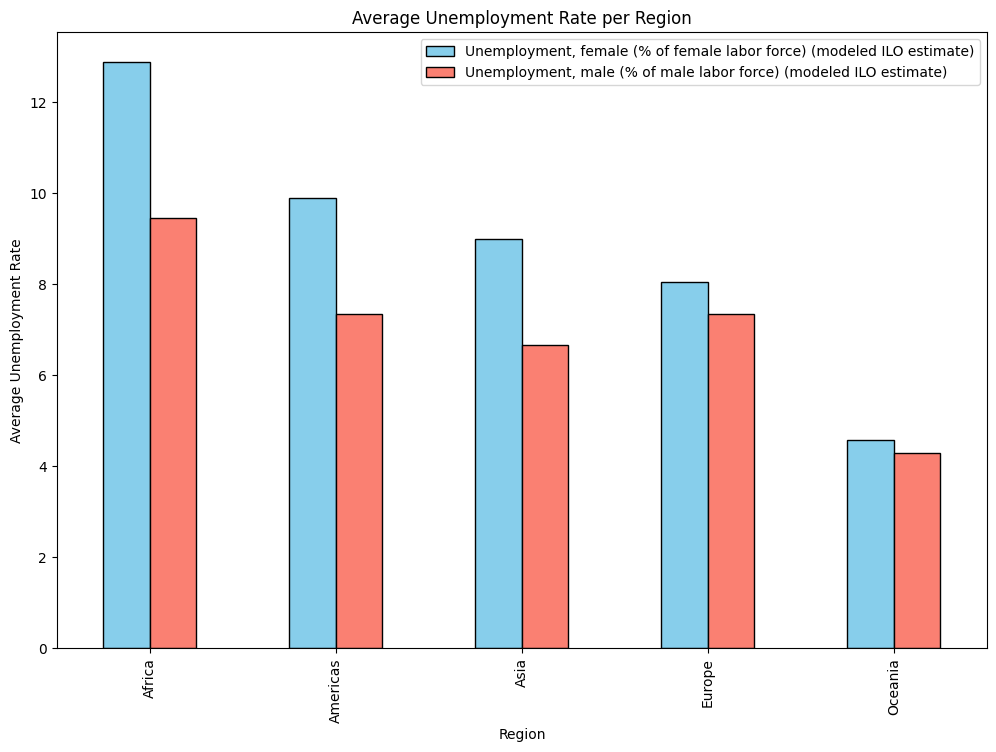

In [58]:
#plotting the values
unemploy_df.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'], edgecolor='black')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate per Region')

plt.show()

In [39]:
# Average Unemployment rate over the years (2019 - 2021) per region
result_df = cleaned_df.groupby(['region', 'Year'])[['Unemployment, female (% of female labor force) (modeled ILO estimate)', 'Unemployment, male (% of male labor force) (modeled ILO estimate)']].mean().reset_index()
result_df

,region,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
0,Africa,2019.0,11.303100,8.636700
1,Africa,2020.0,12.467800,9.668867
2,Africa,2021.0,17.962917,11.054000
3,Americas,2019.0,8.553412,6.220000
4,Americas,2020.0,11.100765,8.450529
5,Americas,2021.0,10.178778,7.375444
6,Asia,2019.0,9.327042,6.347750
7,Asia,2020.0,10.424708,7.611500
8,Asia,2021.0,6.638722,5.847944
9,Europe,2019.0,8.446941,7.371941


For Africa, the unemployment rate has risen both for male and females. For the Americas and Asia, the unemployment rate peaked in 2020 and dropped in 2021. That of Europe dropped while Oceania has kept thiers steady over the 3-year period.

In [41]:
# Average Government expenditure per region
cleaned_df.groupby('region')['Government expenditure on education, total (% of government expenditure)'].mean()

region
Africa      15.751118
Americas    15.780335
Asia        14.527950
Europe      11.034527
Oceania     17.246955
Name: Government expenditure on education, total (% of government expenditure), dtype: float64

In [43]:
# Average Government expenditure per region over the years
cleaned_df.groupby(['region', 'Year'])['Government expenditure on education, total (% of government expenditure)'].mean()

region    Year  
Africa    2019.0    16.724285
          2020.0    15.798618
          2021.0    12.390715
Americas  2019.0    16.534883
          2020.0    15.358931
          2021.0    13.582163
Asia      2019.0    14.631065
          2020.0    14.981765
          2021.0    13.496601
Europe    2019.0    11.036683
          2020.0    10.639109
          2021.0    16.538040
Oceania   2019.0    13.164990
          2020.0    19.287937
          2021.0          NaN
Name: Government expenditure on education, total (% of government expenditure), dtype: float64

In [45]:
# Average total business density rate per region
cleaned_df.groupby('region')['Total business density rate'].mean()

region
Africa       28.201977
Americas     46.752845
Asia         21.107463
Europe       79.970492
Oceania     184.717089
Name: Total business density rate, dtype: float64

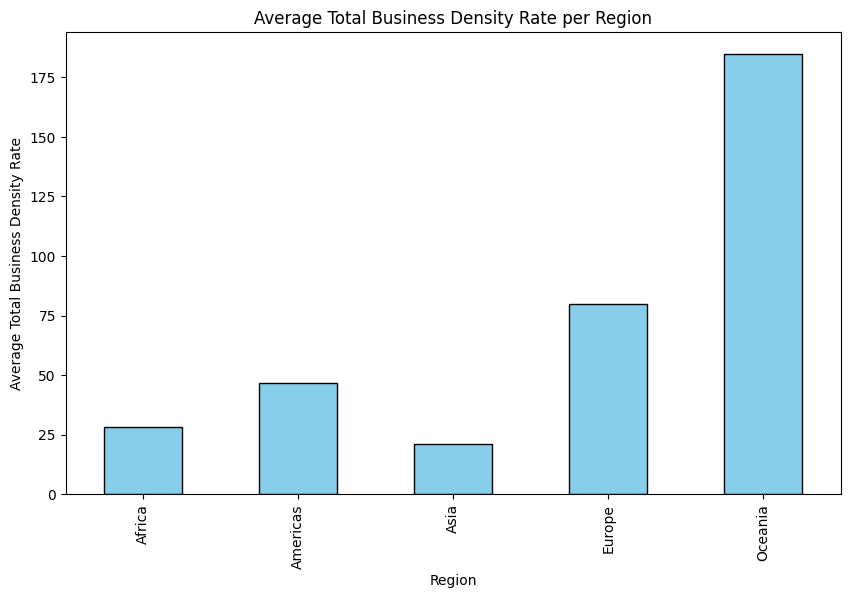

In [62]:
density_series = cleaned_df.groupby('region')['Total business density rate'].mean()

# Plotting business density
density_series.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Average Total Business Density Rate')
plt.title('Average Total Business Density Rate per Region')

# Display the plot
plt.show()

Oceania has the highest average business density (184.72), which shows that a high concentration of businesses in the region, while Africa demonstrates a moderate density (28.20), suggesting a relatively lower concentration of businesses in the region.

In [46]:
# Average total business density rate per region over the years
cleaned_df.groupby(['region', 'Year'])['Total business density rate'].mean().dropna()

region    Year  
Africa    2019.0     37.364614
          2020.0     17.512232
Americas  2019.0     49.757019
          2020.0     43.319504
Asia      2019.0     20.270358
          2020.0     21.944568
Europe    2019.0     74.008429
          2020.0     87.016566
Oceania   2019.0    182.341522
          2020.0    187.092655
Name: Total business density rate, dtype: float64

In [55]:
# total business density rate per region

busndty_series = cleaned_df.groupby('region')['TOTAL Number of \nLimited Liability Companies'].sum()
busndty_series

region
Africa       5545559.0
Americas     9075278.0
Asia         8096503.0
Europe      10755063.0
Oceania      6830560.0
Name: TOTAL Number of \nLimited Liability Companies, dtype: float64

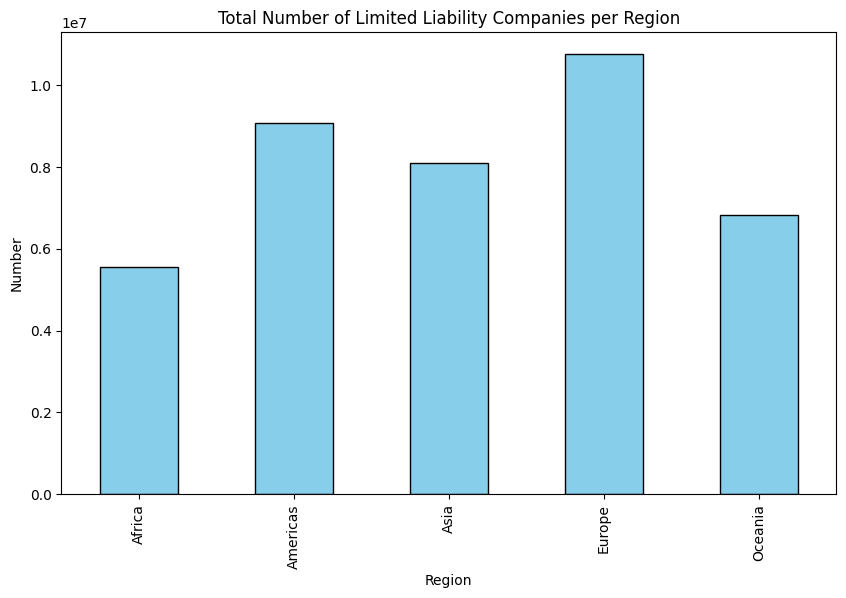

In [56]:
busndty_series.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Number')
plt.title('Total Number of Limited Liability Companies per Region')

# Display the plot
plt.show()

Europe has the highest number of LLCs among the four regions while Africa has the least. In descending order, we have Europe, Americas, Asia, Oceania and Africa

In [64]:
cleaned_df.groupby('region')['Access to electricity (% of population)'].mean()

region
Africa      60.429811
Americas    99.086098
Asia        95.497629
Europe      99.994118
Oceania     95.557747
Name: Access to electricity (% of population), dtype: float64

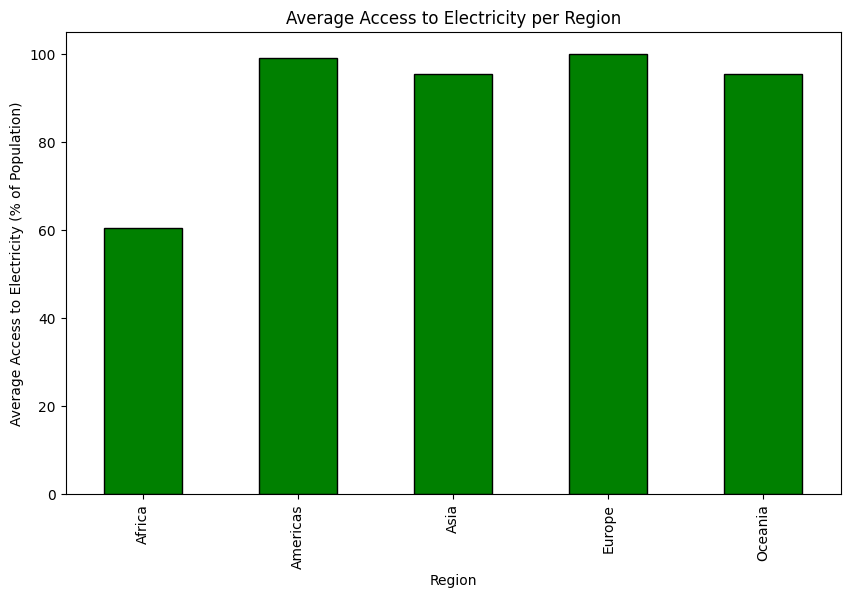

In [65]:
elec_series = cleaned_df.groupby('region')['Access to electricity (% of population)'].mean()

# Plotting the data
elec_series.plot(kind='bar', figsize=(10, 6), color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Average Access to Electricity (% of Population)')
plt.title('Average Access to Electricity per Region')

# Display the plot
plt.show()

In [66]:
# Assuming your DataFrame is named df
strategy_mapping = {0: 'No Strategy', 1: 'Developing a Strategy', 2: 'Strategy Adopted', 3: 'Strategy Operationalized'}

cleaned_df['Strategy_existence'] = cleaned_df['Strategy_existence'].map(strategy_mapping)


<ipython-input-66-c89abe5fb286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Strategy_existence'] = cleaned_df['Strategy_existence'].map(strategy_mapping)


In [67]:
cleaned_df.Strategy_existence.unique()

array(['Developing a Strategy', 'No Strategy', 'Strategy Operationalized',
       'Strategy Adopted'], dtype=object)

In [70]:
# Counting the occurrences of each strategy category in each region
strategy_counts = cleaned_df.groupby(['region', 'Strategy_existence'])['name'].count().unstack().fillna(0)

strategy_counts


Strategy_existence,Developing a Strategy,No Strategy,Strategy Adopted,Strategy Operationalized
region,,,,
Africa,21.0,0.0,37.0,14.0
Americas,9.0,4.0,13.0,17.0
Asia,18.0,0.0,36.0,12.0
Europe,1.0,3.0,5.0,53.0
Oceania,1.0,0.0,2.0,5.0


# **INSIGHTS**

1. Europe has the highest number of LLCs among the four regions while Africa has the least. In descending order, we have Europe, Americas, Asia, Oceania and Africa

2. Oceania has the highest average business density (184.72), which shows that a high concentration of businesses in the region, while Africa demonstrates a moderate density (28.20), suggesting a relatively lower concentration of businesses in the region.

3. Africa has the highest average unemployment rates for both male and female labor forces among the five regions, with Oceania having the lowest rates across genders. Additionally, the unemployment rate has risen both for male and females. For the Americas and Asia, the unemployment rate peaked in 2020 and dropped in 2021. That of Europe dropped while Oceania has kept thiers steady over the 3-year period.

4. Access to electricity is nearly universal in Europe (99.99%) and the Americas (99.09%), while Africa shows a lower average access of approximately 60.43%.

5.

# **Recommendations**

1. The African government should create policies that encourage business development and attract investments to enhance business density in Africa, contributing to economic growth and job creation.